In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data_path = "../../../../install/real_demo/share/real_demo/data/planner/benchmark/"
file_name = "bench_1000_15_2102.npz"

data = np.load(data_path+file_name, allow_pickle=True)

In [39]:
data_path = "../../../../install/real_demo/share/real_demo/data/planner/benchmark/"
batch_sizes = range(250, 1751, 250)
file_names = list()
for batch_size in batch_sizes:
    file_names.append(f"bench_{batch_size}_15_2110.npz") 

print(file_names)

data_files = list()
for file_name in file_names:
    data = np.load(data_path+file_name, allow_pickle=True)
    data_files.append(data)


['bench_250_15_2110.npz', 'bench_500_15_2110.npz', 'bench_750_15_2110.npz', 'bench_1000_15_2110.npz', 'bench_1250_15_2110.npz', 'bench_1500_15_2110.npz', 'bench_1750_15_2110.npz']


In [130]:
data_path = "../../../../install/real_demo/share/real_demo/data/planner/benchmark/"
horizon_len = range(10, 16, 5)
file_names = list()
for horizon in horizon_len:
    file_names.append(f"bench_1000_{horizon}_2104.npz") 

print(file_names)

data_files = list()
for file_name in file_names:
    data = np.load(data_path+file_name, allow_pickle=True)
    data_files.append(data)


['bench_1000_10_2104.npz', 'bench_1000_15_2104.npz']


In [40]:
data = data_files[0]
key_list = data.files

for key in key_list:
    print(f'{key} : {data[key].shape}')

batch_size : (1,)
horizon : (1,)
total_time : (21,)
step_time : (21,)
success : (21,)
reason : (21,)
target_0 : (21, 7)
theta : (21,)
thetadot : (21,)
cost_r : (21,)
cost_eef_to_obj : (21,)
cost_obj_to_targ : (21,)
cost_dist : (21,)
cost_zy : (21,)


In [41]:
print(data['batch_size'])
print(data['horizon'])
print(data['total_time'])
print(data['success'])
print(data['reason'])

[250]
[15]
[81.77442718 60.07902718 60.06066966 60.06371546 60.05054188 60.04306626
 31.0276649  14.05873895 13.15486002 21.18650293 60.04560447 60.04840016
 60.04636931 53.11724877 49.20502067 32.73344684 60.0443716  23.79971337
 16.96811652 60.04856539 60.04658604]
[0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0]
['timeout' 'timeout' 'timeout' 'timeout' 'timeout' 'timeout' 'na'
 'collision' 'collision' 'collision' 'timeout' 'timeout' 'timeout' 'na'
 'na' 'na' 'timeout' 'na' 'collision' 'timeout' 'timeout']


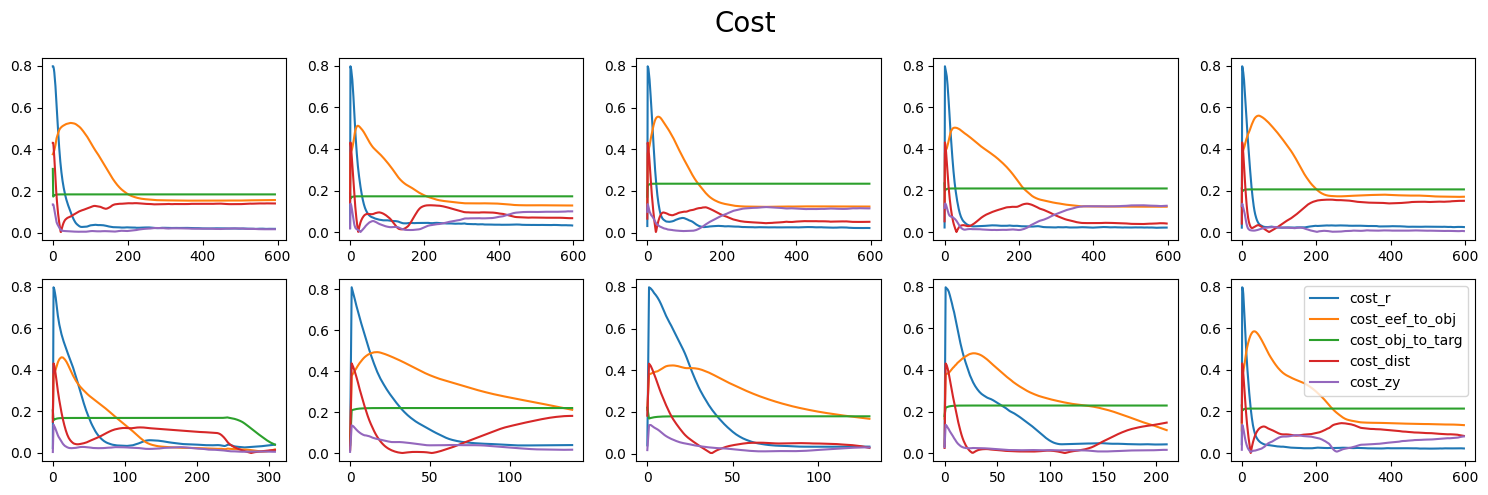

In [42]:
cost_name_list = ['cost_r', 'cost_eef_to_obj', 'cost_obj_to_targ', 'cost_dist', 'cost_zy']


fig, axes = plt.subplots(2, 5, figsize=(15, 5))
idx = 1
for i in range(2):
    for j in range(5):
        for cost in cost_name_list:
            axes[i, j].plot(data[cost][idx], label=cost)
        idx+=1

fig.suptitle("Cost", fontsize=20)

plt.tight_layout()  
plt.legend()
plt.show()

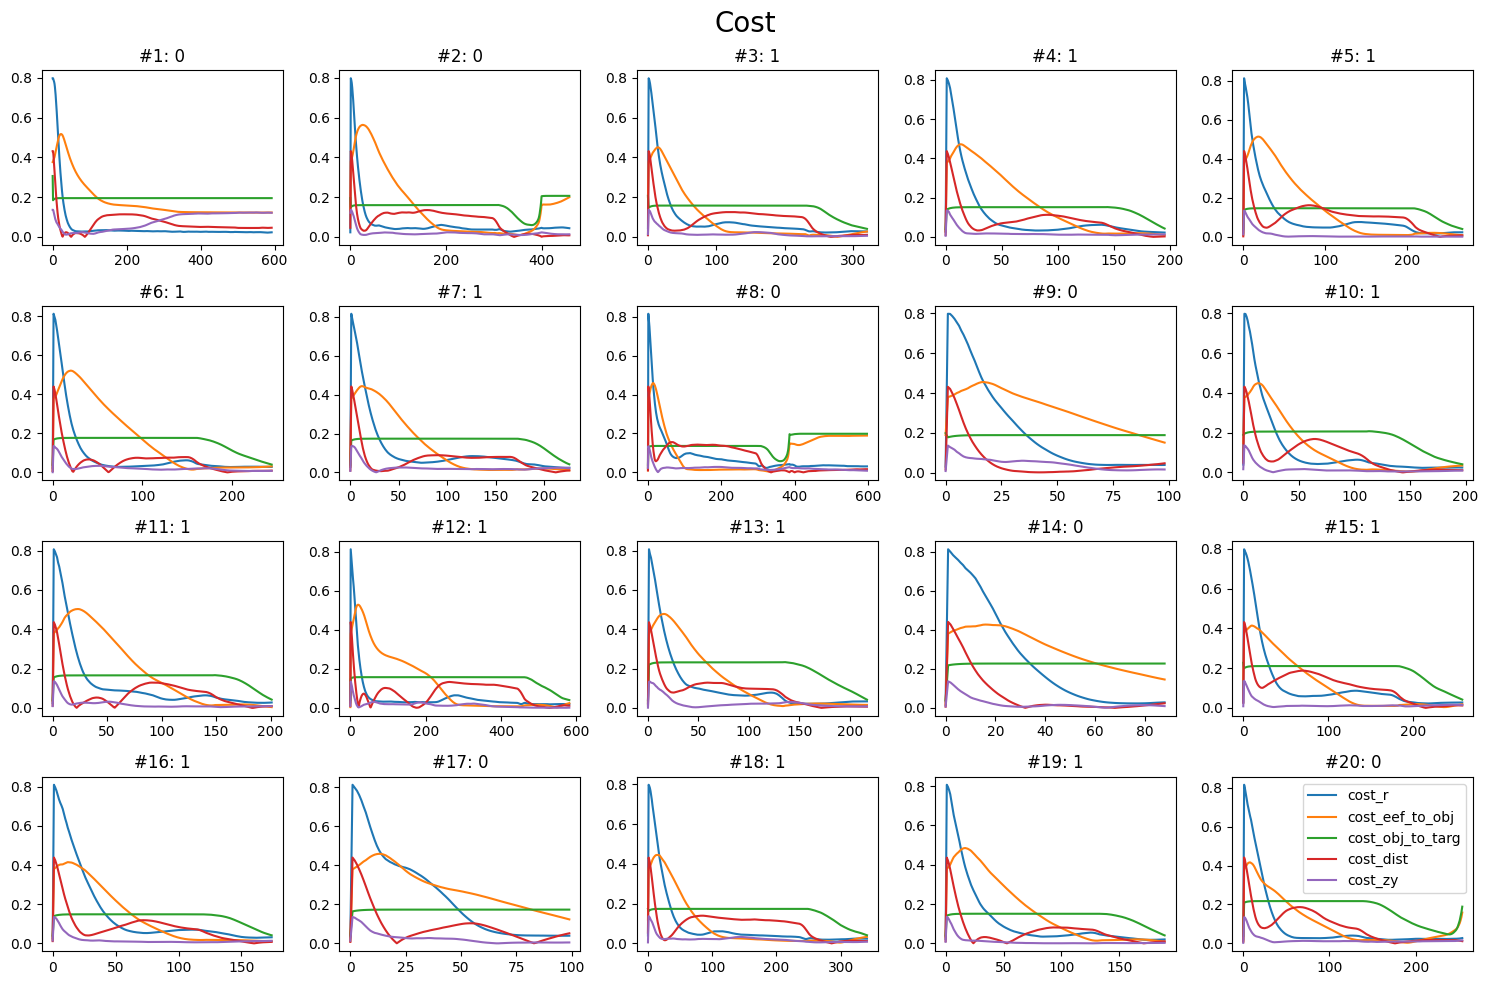

In [43]:
cost_name_list = ['cost_r', 'cost_eef_to_obj', 'cost_obj_to_targ', 'cost_dist', 'cost_zy']

fig, axes = plt.subplots(4, 5, figsize=(15, 10))
idx = 1
b = 1
for i in range(4):
    for j in range(5):
        for cost in cost_name_list:
            axes[i, j].plot(data_files[b][cost][idx], label=cost)

        axes[i, j].set_title(f"#{idx}: {data_files[b]['success'][idx]}")
        idx+=1

fig.suptitle("Cost", fontsize=20)

plt.tight_layout()  
plt.legend()
plt.show()

In [10]:
print(data_files[1]['reason'][9])

collision


In [29]:
fs = 16

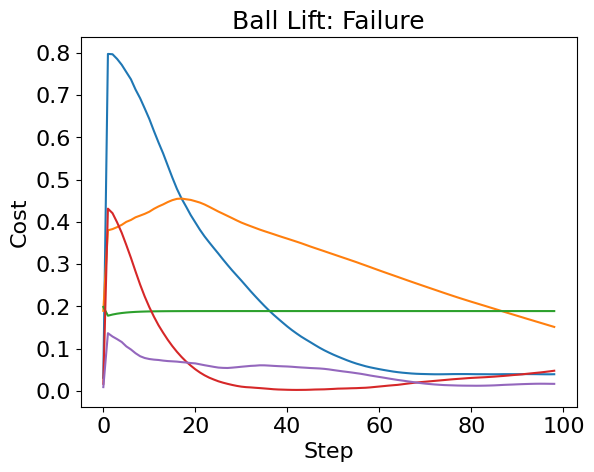

In [31]:

for cost in cost_name_list:
    plt.plot(data_files[1][cost][9])

plt.xlabel("Step", fontsize=fs)
plt.ylabel("Cost", fontsize=fs) 

plt.xticks(fontsize=fs) 
plt.yticks(fontsize=fs)

plt.title("Ball Lift: Failure", fontsize=fs+2) 

plt.show()

In [36]:
print(data_files[6]['reason'][18])

na


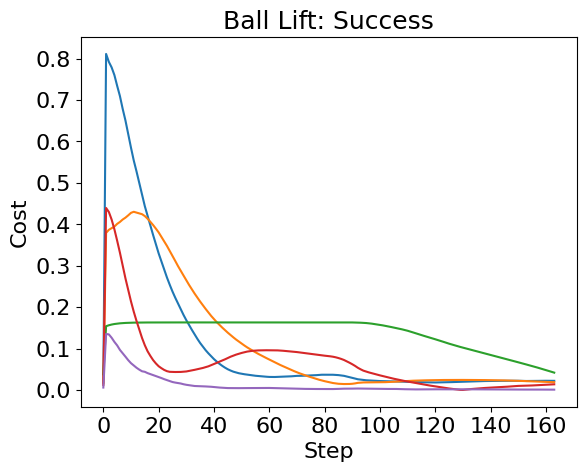

In [44]:
for cost in cost_name_list:
    plt.plot(data_files[6][cost][18])

plt.xlabel("Step", fontsize=fs)
plt.ylabel("Cost", fontsize=fs) 

plt.xticks(fontsize=fs) 
plt.yticks(fontsize=fs)

plt.title("Ball Lift: Success", fontsize=fs+2) 

plt.show()

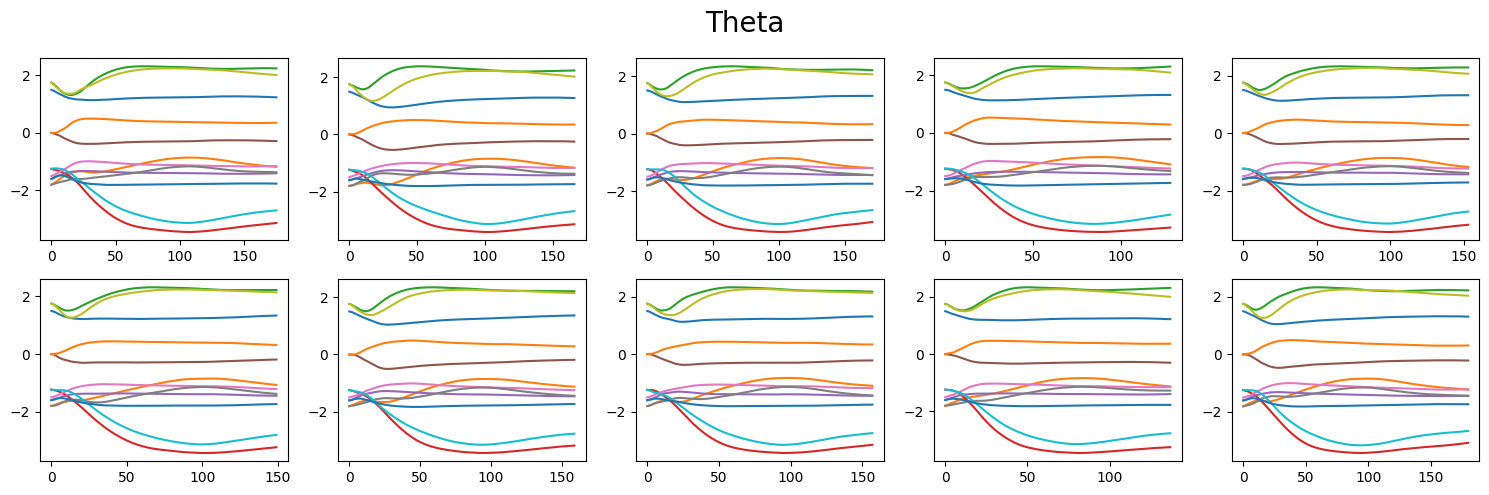

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
idx = 1
b=6
for i in range(2):
    for j in range(5):
        axes[i, j].plot(data_files[b]['theta'][idx])
        idx+=1

fig.suptitle("Theta", fontsize=20)

plt.tight_layout()  
plt.show()

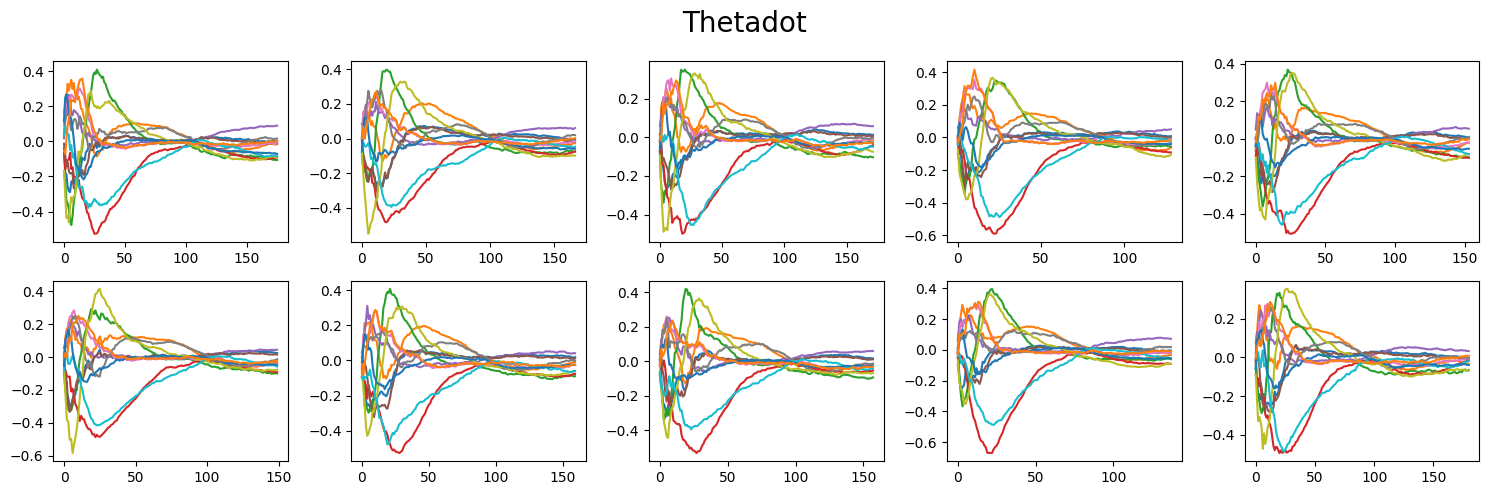

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
idx = 1
b = 6
for i in range(2):
    for j in range(5):
        axes[i, j].plot(data_files[b]['thetadot'][idx])
        idx+=1

fig.suptitle("Thetadot", fontsize=20)

plt.tight_layout()  
plt.show()

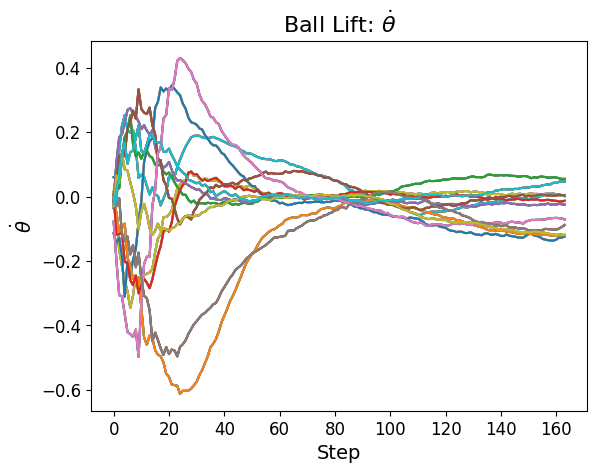

In [32]:
for cost in cost_name_list:
    plt.plot(data_files[6]['thetadot'][18])

plt.xlabel("Step", fontsize=14)
plt.ylabel(r"$\dot{\theta}$", fontsize=14) 


plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.title("Ball Lift: " + r"$\dot{\theta}$", fontsize=16) 

plt.show()

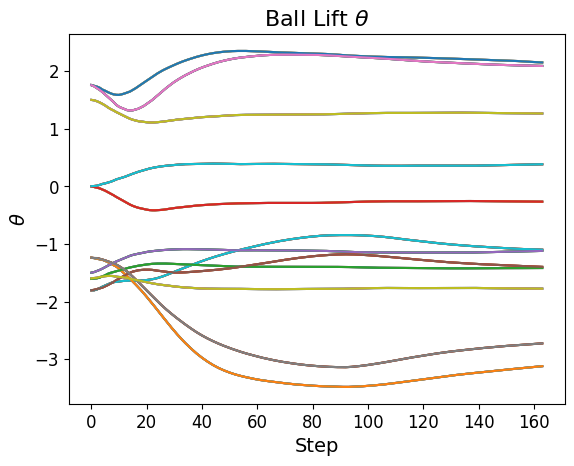

In [33]:

for cost in cost_name_list:
    plt.plot(data_files[6]['theta'][18])

plt.xlabel("Step", fontsize=14)
plt.ylabel(r"$\theta$", fontsize=14) 

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.title("Ball Lift " + r"$\theta$", fontsize=16) 

plt.show()

5
13
14
17
20
19
20
[25, 65, 70, 85, 100, 95, 100]


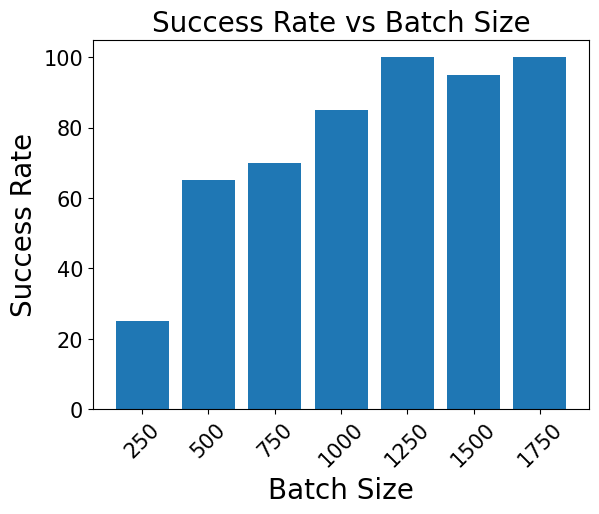

In [46]:
success_rate = list()
for data in data_files:
    success = data['success'][1:]
    print(sum(success))
    success_rate.append(int(sum(success)/len(success)*100))

print(success_rate)
f_s = 20

plt.xlabel("Batch Size", fontsize=f_s)
plt.ylabel("Success Rate", fontsize=f_s)
plt.title("Success Rate vs Batch Size", fontsize=f_s)
plt.tick_params(axis='both', labelsize=15)   # Tick labels font size
plt.xticks(batch_sizes)
plt.xticks(rotation=45)
plt.bar(batch_sizes, success_rate, width=200)

plt.show()


3
9
11
14
14
18
18
[15, 45, 55, 70, 70, 90, 90]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (7,).

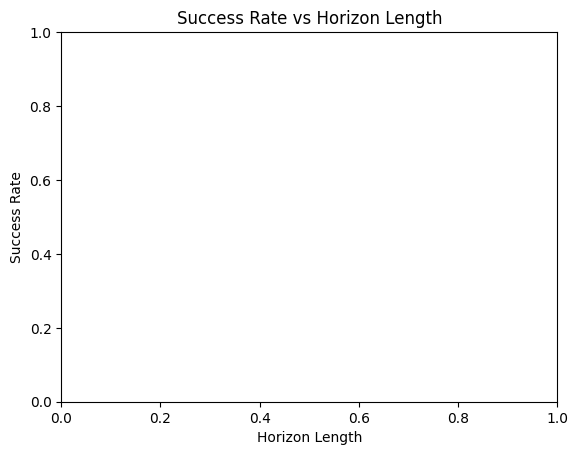

In [143]:
success_rate = list()
for data in data_files:
    success = data['success'][1:]
    print(sum(success))
    success_rate.append(int(sum(success)/len(success)*100))

print(success_rate)

plt.xlabel("Horizon Length")
plt.ylabel("Success Rate")
plt.title("Success Rate vs Horizon Length")
plt.bar(horizon_len, success_rate, width=2)
plt.show()

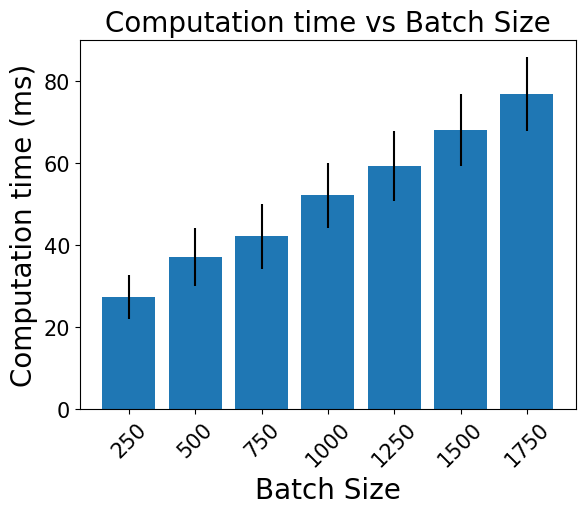

In [216]:
comp_time_mean = list()
comp_time_std = list()

for data in data_files:
    comp_time = np.concatenate(data['step_time'][1:])
    comp_time_mean.append(np.mean(comp_time[1:]))
    comp_time_std.append(np.std(comp_time[1:]))




plt.xlabel("Batch Size", fontsize=f_s)
plt.ylabel("Computation time (ms)", fontsize=f_s)
plt.title("Computation time vs Batch Size", fontsize=f_s)
plt.tick_params(axis='both', labelsize=15)   # Tick labels font size
plt.xticks(batch_sizes)
plt.xticks(rotation=45)
plt.bar(batch_sizes, comp_time_mean, yerr=comp_time_std, width=200)
plt.show()

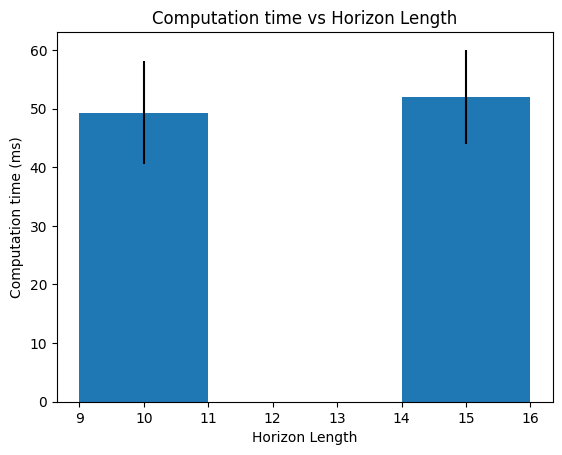

In [ ]:
comp_time_mean = list()
comp_time_std = list()

for data in data_files:
    comp_time = np.concatenate(data['step_time'][1:])
    comp_time_mean.append(np.mean(comp_time[1:]))
    comp_time_std.append(np.std(comp_time[1:]))

plt.xlabel("Horizon Length", fontsize=f_s)
plt.ylabel("Computation time (ms)", fontsize=f_s)
plt.title("Computation time vs Horizon Length", fontsize=f_s)
plt.bar(horizon_len, comp_time_mean, yerr=comp_time_std, width=2)
plt.show()

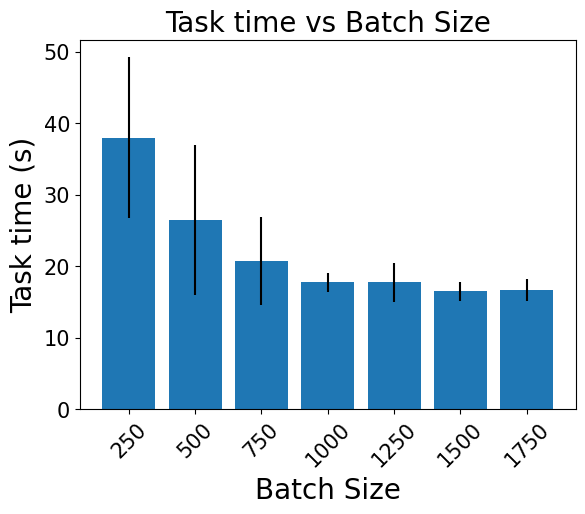

In [218]:
total_time_mean = list()
total_time_std = list()

for data in data_files:
    success = np.array(data['success'][1:], dtype=bool)
    comp_time = np.array(data['total_time'][1:])[success]
    total_time_mean.append(np.mean(comp_time))
    total_time_std.append(np.std(comp_time))

plt.xlabel("Batch Size", fontsize=f_s)
plt.ylabel("Task time (s)", fontsize=f_s)
plt.title("Task time vs Batch Size", fontsize=f_s)
plt.tick_params(axis='both', labelsize=15)   # Tick labels font size
plt.xticks(batch_sizes)
plt.xticks(rotation=45)
plt.bar(batch_sizes, total_time_mean, yerr=total_time_std, width=200)
plt.show()

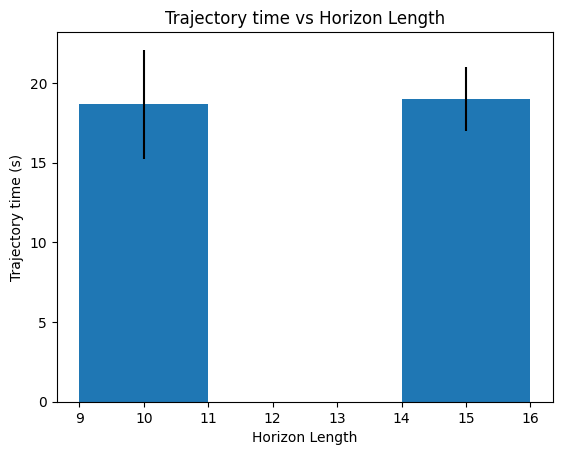

In [142]:
total_time_mean = list()
total_time_std = list()

for data in data_files:
    success = np.array(data['success'][1:], dtype=bool)
    comp_time = np.array(data['total_time'][1:])[success]
    total_time_mean.append(np.mean(comp_time))
    total_time_std.append(np.std(comp_time))

plt.xlabel("Horizon Length")
plt.ylabel("Trajectory time (s)")
plt.title("Trajectory time vs Horizon Length")
plt.bar(horizon_len, total_time_mean, yerr=total_time_std, width=2)
plt.show()